In [1]:
# JUEGO DE LA VIDA SECUENCIAL

# Referencia:
# https://github.com/arangogithub/juegodelavida

REGLAS

El tablero es una rejilla de celdas cuadradas que tienen dos posibles estados: viva y muerta.
Cada célula tiene ocho células vecinas: se cuentan también las de las diagonales.
En cada paso, todas las células se actualizan instantáneamente teniendo en cuenta la siguiente regla:
    - Cada célula viva con 2 o 3 células vecinas vivas sobrevive.     
    - Cada célula con 4 o más células vecinas vivas muere por superpoblación. Cada célula con 1 o ninguna célula vecina viva 
      muere por soledad.
    - Cada célula muerta con 3 células vecinas vivas nace.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from IPython.display import clear_output

In [2]:
def extender(m):

    a, b = m.shape
    ex = np.zeros((a+2, b+2))
    
    ex[1:a+1, 1:b+1] = m

    return ex

In [3]:
def sumaVecinos(i, j, ex):
    
    s = (
        ex[i, j-1] + ex[i, j+1] + ex[i-1, j-1] + 
        (ex[i-1, j] + ex[i-1, j+1] + ex[i+1, j-1]) + 
        (ex[i+1, j]+ ex[i+1, j+1])
    )
    
    return s

In [4]:
def aplicarReglas(m):

    # dimension de matriz
    a, b = m.shape 

    # extiendo la matriz
    ex  = extender(m)

    # genero la nueva matriz
    nm = np.zeros((a, b), np.int)
    
    for i in range(1, a+1):
        for j in range(1, b+1):
            
            # calculo la suma de los vecinos
            s = sumaVecinos(i, j, ex)
            
            # aplico las reglas
            if(s > 3 or s <= 1): 
                nm[i-1, j-1] = 0
                
            if(s == 3 and m[i-1, j-1] == 0): 
                nm[i-1, j-1] = 1
                
            if((s == 3 or s == 2) and (m[i-1, j-1] == 1)): 
                nm[i-1, j-1] = 1

    return nm

In [11]:
def evoluciones(cantGeneraciones, mInicial):

    historial = []
    historial.append((mInicial, 0))

    m = mInicial 
    for i in range(cantGeneraciones):

        m = aplicarReglas(m)
        historial.append((m, i+1))
    
    return historial

In [7]:
def generarTablero(m):

    n = len(m)
    dx = 1/n
    pieces = []
    
    frame = patches.Rectangle((0.0, 0.0), 1, 1, fill=False, edgecolor="grey", linewidth=1) 
    pieces.append(frame)
    
    for j in range(n):
        for i in range(n):
            
            if m[i, j] == 1:
                
                p = patches.Rectangle((j/n, (n-1-i)/n), dx, dx, edgecolor="grey", facecolor="black", fill=True, linewidth=1)
                pieces.append(p)
                
            if m[i, j] == 0:
                
                p = patches.Rectangle((j/n, (n-1-i)/n), dx, dx, edgecolor="grey", fill=False, linewidth=1)
                pieces.append(p)
                
    return pieces

In [6]:
def mostrarTablero(x):

    ax1 = plt.subplot(111, aspect='equal')
    shape = generarTablero(x[0])
    
    for p in shape: 
        ax1.add_patch(p)
        
    plt.axis('on')
    plt.title('Evolucion ' + str(x[1]))
    plt.show()

In [8]:
def cargarMatriz():
    
    init = np.zeros((20,20))

    init[1,4] = 1
    init[1,5] = 1
    init[2,4] = 1
    init[3,4] = 1
    init[1,14] = 1
    init[1,15] = 1
    init[2,15] = 1
    init[3,15] = 1
    init[18,4] = 1
    init[18,5] = 1
    init[17,4] = 1
    init[15,4] = 1
    init[18,14] = 1
    init[18,15] = 1
    init[17,15] = 1
    init[16,15] = 1
    init[10, 4] = 1
    init[10, 5] = 1
    init[10, 6] = 1
    init[10, 7] = 1
    init[10, 8] = 1

    return init

In [9]:
def definirMatrizRandom(n):
    
    matriz = np.random.randint(0, 2, (n,n))

    return matriz

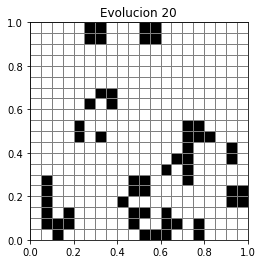

In [12]:
matriz=definirMatrizRandom(20)
#matriz=definirMatriz()

historial = evoluciones(20, matriz)

for i in range(len(historial)):

    clear_output(wait=True)
    mostrarTablero(historial[i])